<a href="https://colab.research.google.com/github/mab2004/Exploratory-Data-Analysis-Titanic/blob/main/Exploratory_Data_Analysis_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic_df = pd.read_csv('train.csv')

# Get a summary of the data, including missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
# Handle missing values in 'Age'
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)
titanic_df['Age'] = titanic_df['Age'].astype(int)

# Drop the 'Cabin' column
titanic_df.drop('Cabin', axis=1, inplace=True)

# Handle missing values in 'Embarked'
most_common_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_common_embarked, inplace=True)

# Verify that all missing values are handled
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


/tmp/ipython-input-550411229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-550411229.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [3]:
# Get basic statistics for all numeric columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Survival rate by gender
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_by_gender)

# Survival rate by passenger class (Pclass)
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


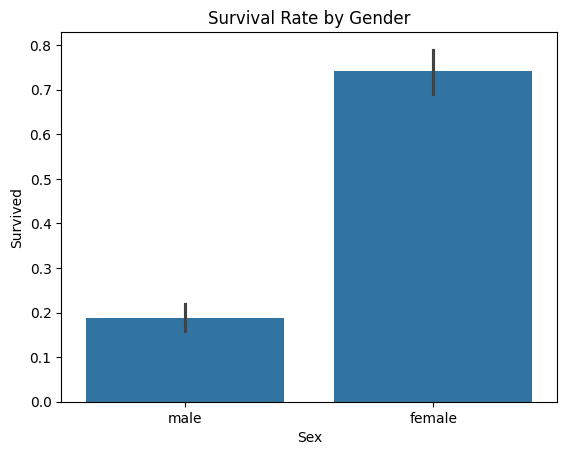

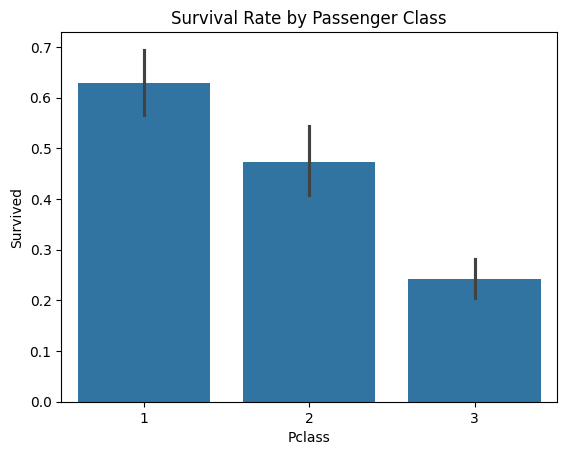

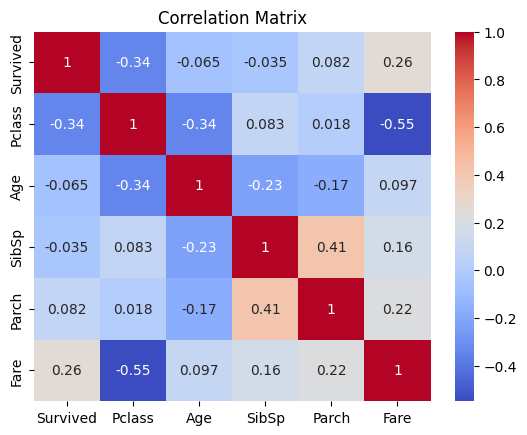

In [5]:
# Create a bar plot for survival by gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

# Create a bar plot for survival by class
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Create a heatmap to visualize correlations between numeric variables
numeric_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = titanic_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
print("--- Titanic Data Analysis Summary ---")

# General Statistics
total_passengers = len(titanic_df)
survival_rate = titanic_df['Survived'].mean() * 100
print(f"\nWe analyzed data for {total_passengers} passengers on the Titanic.")
print(f"The overall survival rate was {survival_rate:.2f}% of passengers.")

# Insights from Group-Based Analysis
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean() * 100
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean() * 100

female_survival = survival_by_gender['female']
male_survival = survival_by_gender['male']
class1_survival = survival_by_class[1]
class2_survival = survival_by_class[2]
class3_survival = survival_by_class[3]

print("\n--- Key Findings on Survival ---")
print(f"• Female passengers had a survival rate of {female_survival:.2f}%, while male passengers had a rate of only {male_survival:.2f}%.")
print(f"• Passengers in 1st class had a survival rate of {class1_survival:.2f}%, which was significantly higher than the {class3_survival:.2f}% for 3rd class passengers.")

# Insights from Correlation Analysis
correlation = titanic_df[['Survived', 'Pclass', 'Fare']].corr()
fare_survival_corr = correlation.loc['Fare', 'Survived']
pclass_fare_corr = correlation.loc['Pclass', 'Fare']

print("\n--- Statistical Relationships ---")
print(f"• There is a positive correlation ({fare_survival_corr:.2f}) between the fare a passenger paid and their chance of survival.")
print(f"• There is a strong negative correlation ({pclass_fare_corr:.2f}) between passenger class (Pclass) and the fare paid, which makes sense as lower class numbers correspond to higher fares.")

print("\n--- Conclusion ---")
print("These findings suggest that a passenger's gender and their socio-economic status (as indicated by their class and fare) were major factors in their survival on the Titanic.")

--- Titanic Data Analysis Summary ---

We analyzed data for 891 passengers on the Titanic.
The overall survival rate was 38.38% of passengers.

--- Key Findings on Survival ---
• Female passengers had a survival rate of 74.20%, while male passengers had a rate of only 18.89%.
• Passengers in 1st class had a survival rate of 62.96%, which was significantly higher than the 24.24% for 3rd class passengers.

--- Statistical Relationships ---
• There is a positive correlation (0.26) between the fare a passenger paid and their chance of survival.
• There is a strong negative correlation (-0.55) between passenger class (Pclass) and the fare paid, which makes sense as lower class numbers correspond to higher fares.

--- Conclusion ---
These findings suggest that a passenger's gender and their socio-economic status (as indicated by their class and fare) were major factors in their survival on the Titanic.
